# llc4320 drifters spectra: Lagrangian vs Eulerian

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import dask.dataframe as dd
from xhistogram.xarray import histogram
%matplotlib inline
from matplotlib import pyplot as plt
from cmocean import cm
import matplotlib.colors as colors

import mitequinox.utils as ut
import mitequinox.parcels as pa
import mitequinox.drifters as dr

INFO: Compiled ParcelsRandom ==> /dev/shm/pbs.6591193.datarmor0/parcels-502027/libparcels_random_8739a829-a5b7-4b11-8125-4fe242109aa6.so


In [2]:
if True:
    from dask.distributed import Client, LocalCluster
    from dask_jobqueue import PBSCluster
    #cluster = PBSCluster()
    cluster = PBSCluster(cores=28, processes=14) # necessary?
    w = cluster.scale(jobs=1)
    # 3 needed for lagrangian lon/lat binning
    # 15 for eulerian binning
    client = Client(cluster)
    client
else:
    from dask.distributed import Client, LocalCluster
    #
    cluster = LocalCluster()
    client = Client(cluster)
    client

In [3]:
client

Client Scheduler: tcp://10.148.0.241:47591 Dashboard: http://10.148.0.241:8787/status,Cluster Workers: 14 Cores: 28 Memory: 111.72 GiB


___________
# Globally averaged

In [4]:
root_dir = '/home/datawork-lops-osi/equinox/mit4320/parcels/'
run_name = 'global_extra_T365j_dt1j_dij50'
p = pa.parcels_output(root_dir+run_name, parquets=['trajectory'])

In [5]:
E = p.load_diagnostic('spectra_uv_T60_mean0_lat_lon.zarr')
E_L = E.E
E_L

<xarray.DataArray 'E' (lon_bins: 359, lat_bins: 119, frequency: 1440)>
dask.array<open_dataset-2366582abcbbe28e7eebd8a23811eafcE, shape=(359, 119, 1440), dtype=float64, chunksize=(359, 60, 100), chunktype=numpy.ndarray>
Coordinates:
  * frequency  (frequency) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins   (lat_bins) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5
  * lon_bins   (lon_bins) float64 -179.5 -178.5 -177.5 ... 176.5 177.5 178.5

In [6]:
E_Eulerian = xr.open_zarr(os.path.join(ut.root_data_dir,'diags/SSUV_T60_lat_lon.zarr'))
E_Eulerian = (E_Eulerian)
E_E = E_Eulerian.E_SSUV
E_E

<xarray.DataArray 'E_SSUV' (frequency: 1440, lon_bins: 359, lat_bins: 119)>
dask.array<open_dataset-45c017b5b72ef2ca5d56ad1bded1187cE_SSUV, shape=(1440, 359, 119), dtype=float64, chunksize=(180, 45, 30), chunktype=numpy.ndarray>
Coordinates:
  * frequency  (frequency) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins   (lat_bins) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5
  * lon_bins   (lon_bins) float64 -179.5 -178.5 -177.5 ... 176.5 177.5 178.5

In [7]:
ds_L_bin = (p.load_diagnostic('spectra_uv_T60_mean0_lat_from_2Dbinned_spectra.zarr')
            .rename({'E':'E_Lagrangian'})
           )
E_L_bin = ds_L_bin.E_Lagrangian
E_L_bin

<xarray.DataArray 'E_Lagrangian' (lat_bins: 119, frequency: 1440)>
dask.array<open_dataset-951c6fd3ca6a5801374347329b4115d6E, shape=(119, 1440), dtype=float64, chunksize=(60, 100), chunktype=numpy.ndarray>
Coordinates:
  * frequency  (frequency) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat_bins   (lat_bins) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5

In [8]:
# Lagrangian (2D binned)
E_L_bin_uv_mean = (E_L_bin.where(E_L_bin.lat_bins>0)).mean(dim=('lat_bins'))
E_L_bin_uv_mean_2 = (E_L_bin.where(E_L_bin.lat_bins<0)).mean(dim=('lat_bins'))
E_L_bin_uv_mean_2 = E_L_bin_uv_mean_2.assign_coords(frequency=E_L_bin_uv_mean_2.frequency * -1.)

In [9]:
# Lagrangian (raw)
E_L_uv_mean = (E_L.where(E_L.lat_bins>0)).mean(dim=('lat_bins','lon_bins'))
E_L_uv_mean_2 = (E_L.where(E_L.lat_bins<0)).mean(dim=('lat_bins','lon_bins'))
E_L_uv_mean_2 = E_L_uv_mean_2.assign_coords(frequency=E_L_uv_mean_2.frequency * -1.)

In [10]:
# Eulerian
E_E_uv_mean = (E_E.where(E_E.lat_bins>0)).mean(dim=('lat_bins','lon_bins'))
E_E_uv_mean_2 = (E_E.where(E_E.lat_bins<0)).mean(dim=('lat_bins','lon_bins'))
E_E_uv_mean_2 = E_E_uv_mean_2.assign_coords(frequency=E_E_uv_mean_2.frequency * -1.)

tornado.application - ERROR - Uncaught exception GET /status/ws (10.148.1.145)
HTTPServerRequest(protocol='http', host='localhost:8787', method='GET', uri='/status/ws', version='HTTP/1.1', remote_ip='10.148.1.145')
Traceback (most recent call last):
  File "/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/tornado/websocket.py", line 954, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/tornado/web.py", line 3173, in wrapper
    return method(self, *args, **kwargs)
  File "/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.8/site-packages/bokeh/server/views/ws.py", line 140, in open
    raise ProtocolError("Token is expired.")
bokeh.protocol.exceptions.ProtocolError: Token is expired.


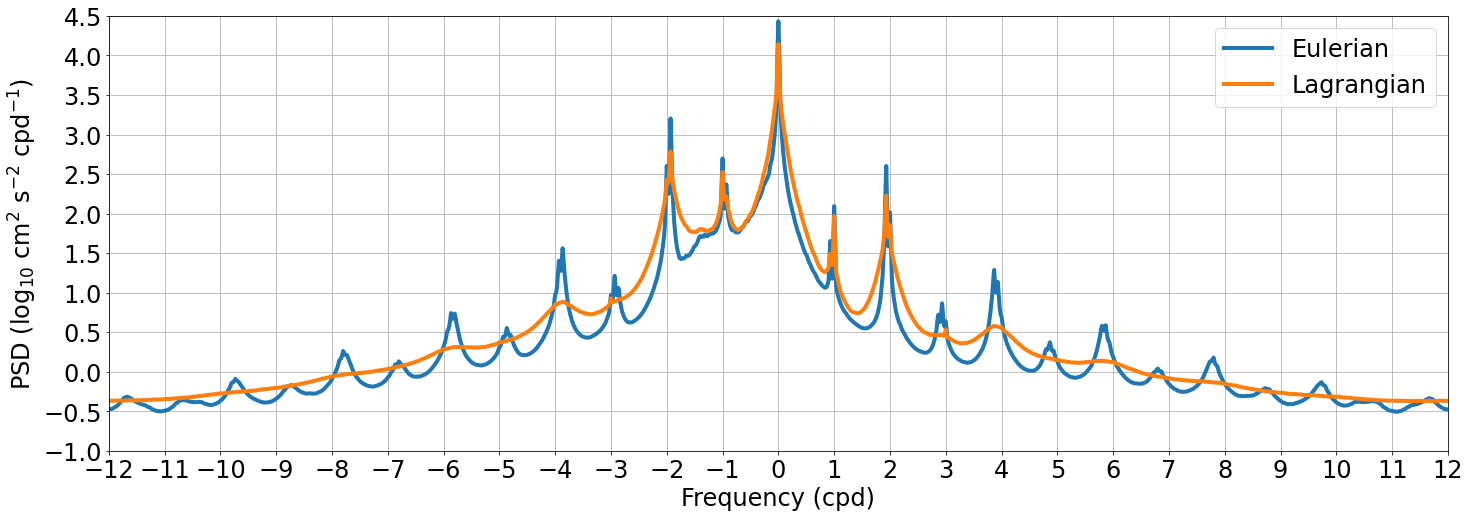

In [11]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Eulerian', 'Lagrangian', 'Lagrangian (raw)']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=4)
(np.log10((E_L_bin_uv_mean+E_L_bin_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=4)
#(np.log10((E_L_uv_mean+E_L_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[2],linewidth=4,color='tab:orange', ls='--')

ax.grid()
ax.legend()
ax.set_xlim([-12.,12.])
ax.set_xticks([-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.])
ax.set_ylim([-1,4.5])
ax.set_yticks([-1,-0.5, 0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_global_mean_EulvsLag.png')

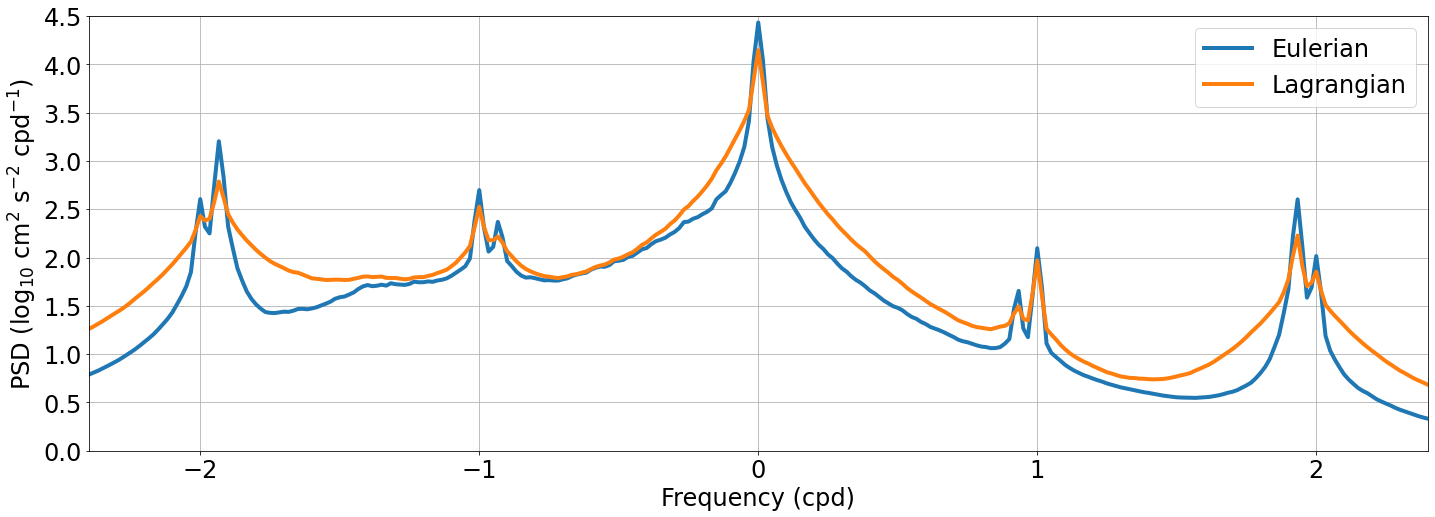

In [12]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Eulerian', 'Lagrangian', 'Lagrangian (raw)']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=4)
(np.log10((E_L_bin_uv_mean+E_L_bin_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=4)
#(np.log10((E_L_uv_mean+E_L_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[2],linewidth=4,color='tab:orange', ls='--')
ax.grid()
ax.legend()
ax.set_xlim([-2.4,2.4])
#ax.set_xticks([ -4, -3, -2, -1, 0., 1., 2., 3., 4.])
ax.set_ylim([0,4.5])
ax.set_yticks([0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_global_mean_EulvsLag_zoomin.png')

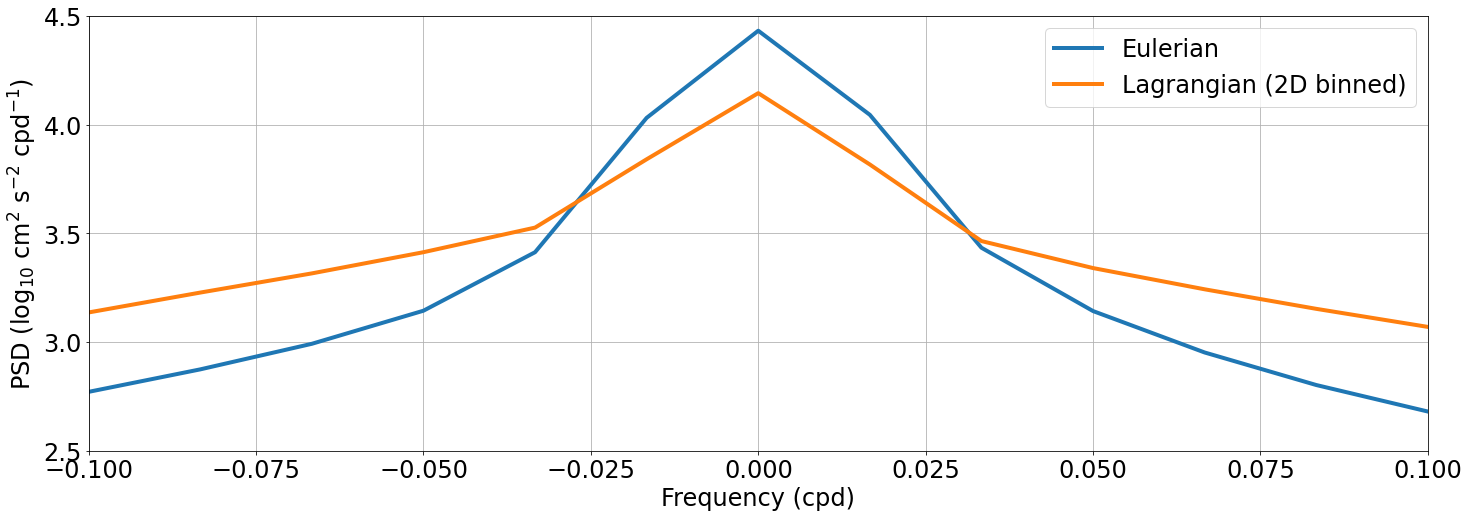

In [13]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Eulerian', 'Lagrangian (2D binned)', 'Lagrangian (raw)']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=4)
(np.log10((E_L_bin_uv_mean+E_L_bin_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=4)
#(np.log10((E_L_uv_mean+E_L_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[2],linewidth=4,color='tab:orange', ls='--')
ax.grid()
ax.legend()
ax.set_xlim([-0.1,0.1])
#ax.set_xticks([ -4, -3, -2, -1, 0., 1., 2., 3., 4.])
ax.set_ylim([2.5,4.5])
ax.set_yticks([2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_global_mean_EulvsLag_zoomin_low.png')

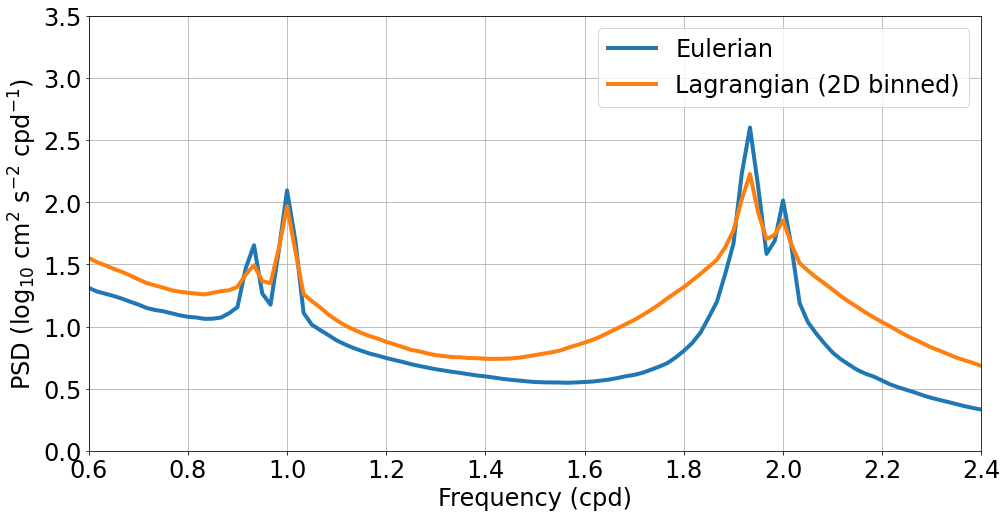

In [14]:
fig, ax = plt.subplots(figsize=(16,8))

labels = ['Eulerian', 'Lagrangian (2D binned)', 'Lagrangian (raw)']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=4)
(np.log10((E_L_bin_uv_mean+E_L_bin_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=4)
#(np.log10((E_L_uv_mean+E_L_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[2],linewidth=4,color='tab:orange', ls='--')
ax.grid()
ax.legend()
ax.set_xlim([0.6,2.4])
#ax.set_xticks([ -4, -3, -2, -1, 0., 1., 2., 3., 4.])
ax.set_ylim([0,3.5])
#ax.set_yticks([1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_global_mean_EulvsLag_zoomin_tides+.png')

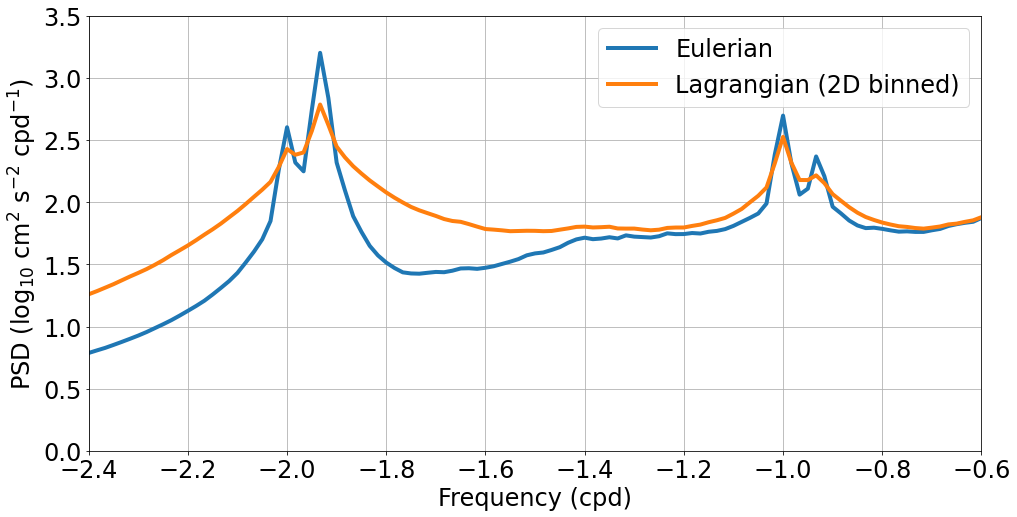

In [15]:
fig, ax = plt.subplots(figsize=(16,8))

labels = ['Eulerian', 'Lagrangian (2D binned)', 'Lagrangian (raw)']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=4)
(np.log10((E_L_bin_uv_mean+E_L_bin_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=4)
#(np.log10((E_L_uv_mean+E_L_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[2],linewidth=4,color='tab:orange', ls='--')
ax.grid()
ax.legend()
ax.set_xlim([-2.4,-0.6])
#ax.set_xticks([ -4, -3, -2, -1, 0., 1., 2., 3., 4.])
ax.set_ylim([0,3.5])
#ax.set_yticks([1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_global_mean_EulvsLag_zoomin_tides-.png')

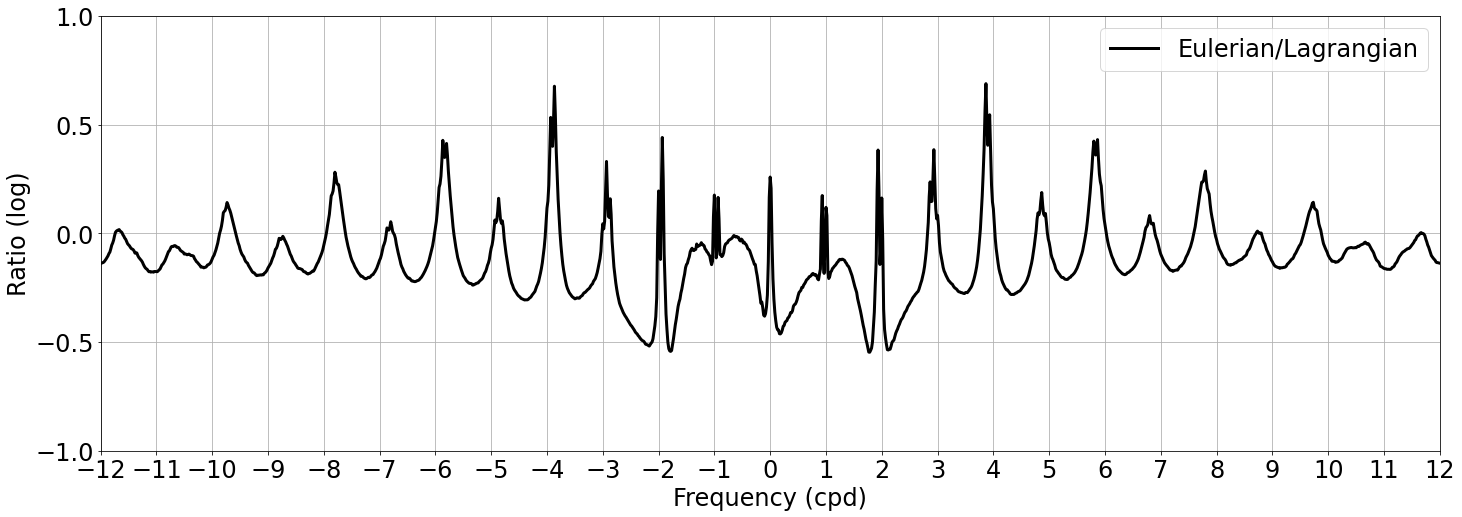

In [26]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Eulerian/Lagrangian']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)/(E_L_uv_mean+E_L_uv_mean_2))).plot(ax=ax,color='black', label=labels[0],linewidth=3)
ax.grid()
ax.legend()
ax.set_xlim([-12.,12.])
ax.set_xticks([-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.])
ax.set_ylim([-1,1])
ax.set_yticks([-1,-0.5, 0., 0.5, 1.])
ax.legend(prop={'size': 24})
ax.set_ylabel('Ratio (log)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

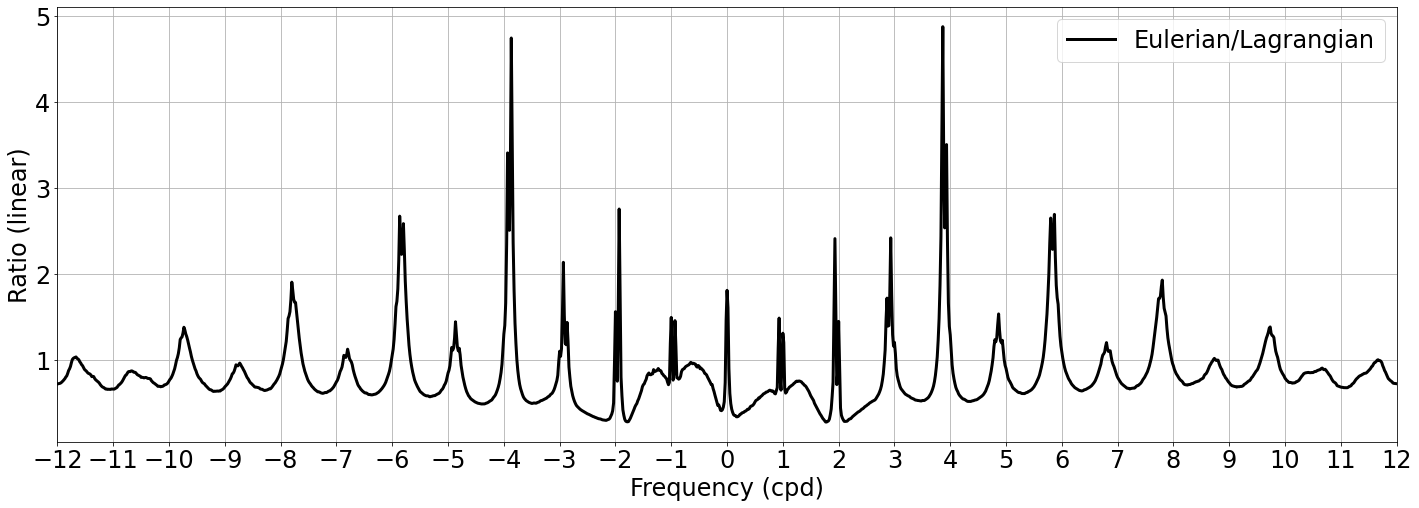

In [27]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Eulerian/Lagrangian']
(((E_E_uv_mean+E_E_uv_mean_2)/(E_L_uv_mean+E_L_uv_mean_2))).plot(ax=ax,color='black', label=labels[0],linewidth=3)
ax.grid()
ax.legend()
ax.set_xlim([-12.,12.])
ax.set_xticks([-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.])
#ax.set_ylim([-1,1])
#ax.set_yticks([-1,-0.5, 0., 0.5, 1.])
ax.legend(prop={'size': 24})
ax.set_ylabel('Ratio (linear)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

# Averaged over 30S to 30N

In [28]:
bound = 30

In [29]:
# Lagrangian (2D binned)
E_L_bin_uv_mean = (E_L_bin.where( (E_L_bin.lat_bins>0)&(E_L_bin.lat_bins<bound) ) ).mean(dim=('lat_bins'))
E_L_bin_uv_mean_2 = (E_L_bin.where( (E_L_bin.lat_bins<0)&(E_L_bin.lat_bins>-bound) ) ).mean(dim=('lat_bins'))
E_L_bin_uv_mean_2 = E_L_bin_uv_mean_2.assign_coords(frequency=E_L_bin_uv_mean_2.frequency * -1.)

In [30]:
# Lagrangian (raw)
E_L_uv_mean = (E_L.where( (E_L.lat_bins>0)&(E_L.lat_bins<bound) )).mean(dim=('lat_bins','lon_bins'))
E_L_uv_mean_2 = (E_L.where( (E_L.lat_bins<0)&(E_L.lat_bins>-bound) ) ).mean(dim=('lat_bins','lon_bins'))
E_L_uv_mean_2 = E_L_uv_mean_2.assign_coords(frequency=E_L_uv_mean_2.frequency * -1.)

In [31]:
# Eulerian
E_E_uv_mean = (E_E.where( (E_E.lat_bins>0)&(E_E.lat_bins<bound) ) ).mean(dim=('lat_bins','lon_bins'))
E_E_uv_mean_2 = (E_E.where( (E_E.lat_bins<0)&(E_E.lat_bins>-bound) ) ).mean(dim=('lat_bins','lon_bins'))
E_E_uv_mean_2 = E_E_uv_mean_2.assign_coords(frequency=E_E_uv_mean_2.frequency * -1.)

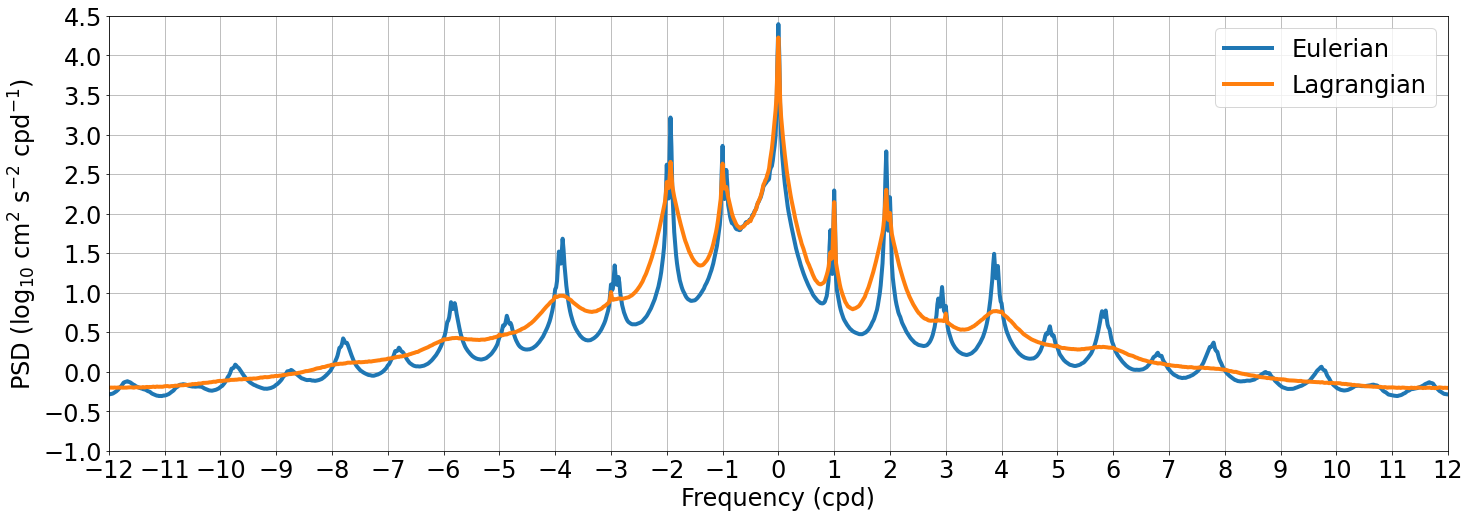

In [32]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Eulerian', 'Lagrangian']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=4)
(np.log10((E_L_bin_uv_mean+E_L_bin_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=4)
#(np.log10((E_L_uv_mean+E_L_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[2],linewidth=4,color='tab:orange', ls='--')
ax.grid()
ax.legend()
ax.set_xlim([-12.,12.])
ax.set_xticks([-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.])
ax.set_ylim([-1,4.5])
ax.set_yticks([-1,-0.5, 0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

#plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_global_mean_EulvsLag.png')

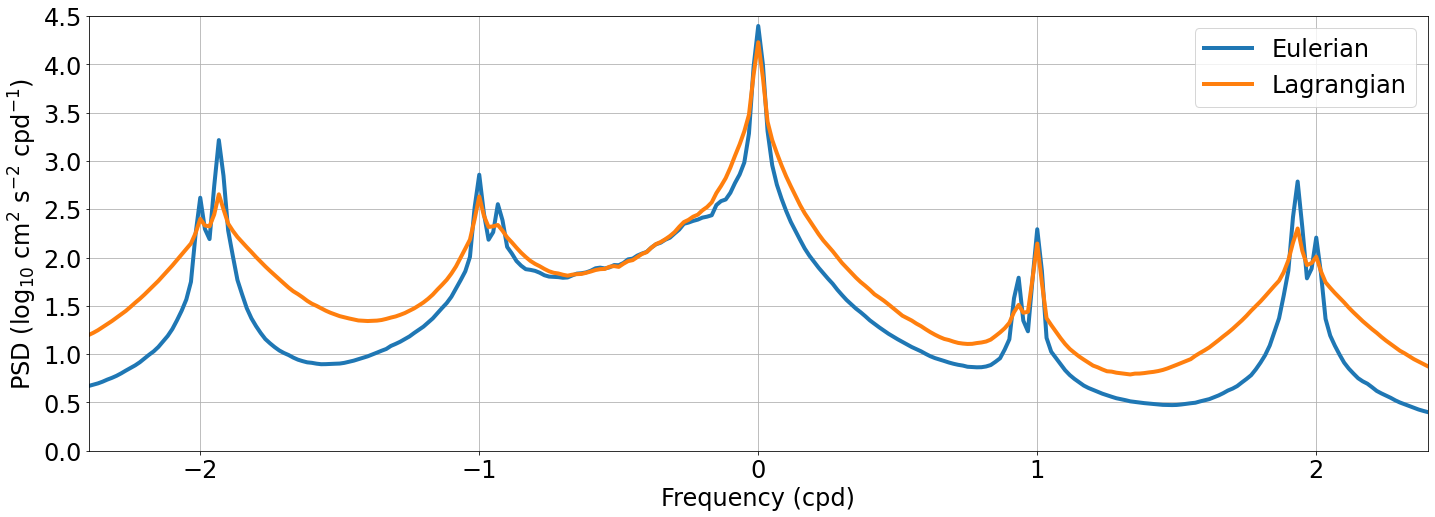

In [33]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Eulerian', 'Lagrangian']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=4)
(np.log10((E_L_bin_uv_mean+E_L_bin_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=4)
#(np.log10((E_L_uv_mean+E_L_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[2],linewidth=4,color='tab:orange', ls='--')
ax.grid()
ax.legend()
ax.set_xlim([-2.4,2.4])
#ax.set_xticks([ -4, -3, -2, -1, 0., 1., 2., 3., 4.])
ax.set_ylim([0,4.5])
ax.set_yticks([0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

#plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_global_mean_EulvsLag_zoomin.png')

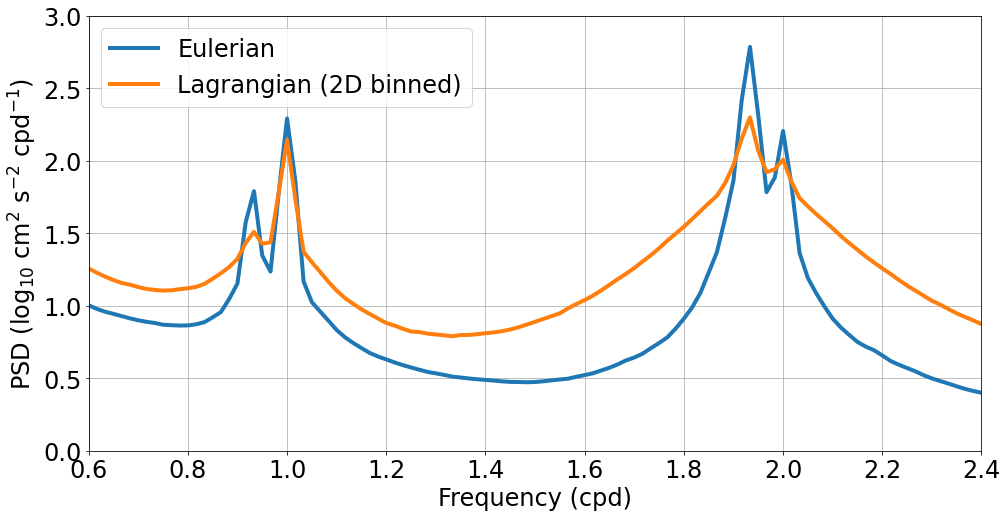

In [34]:
fig, ax = plt.subplots(figsize=(16,8))

labels = ['Eulerian', 'Lagrangian (2D binned)', 'Lagrangian (raw)']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=4)
(np.log10((E_L_bin_uv_mean+E_L_bin_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=4)
#(np.log10((E_L_uv_mean+E_L_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[2],linewidth=4,color='tab:orange', ls='--')
ax.grid()
ax.legend()
ax.set_xlim([0.6,2.4])
#ax.set_xticks([ -4, -3, -2, -1, 0., 1., 2., 3., 4.])
ax.set_ylim([0,3])
#ax.set_yticks([1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

#plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_global_mean_EulvsLag_zoomin.png')

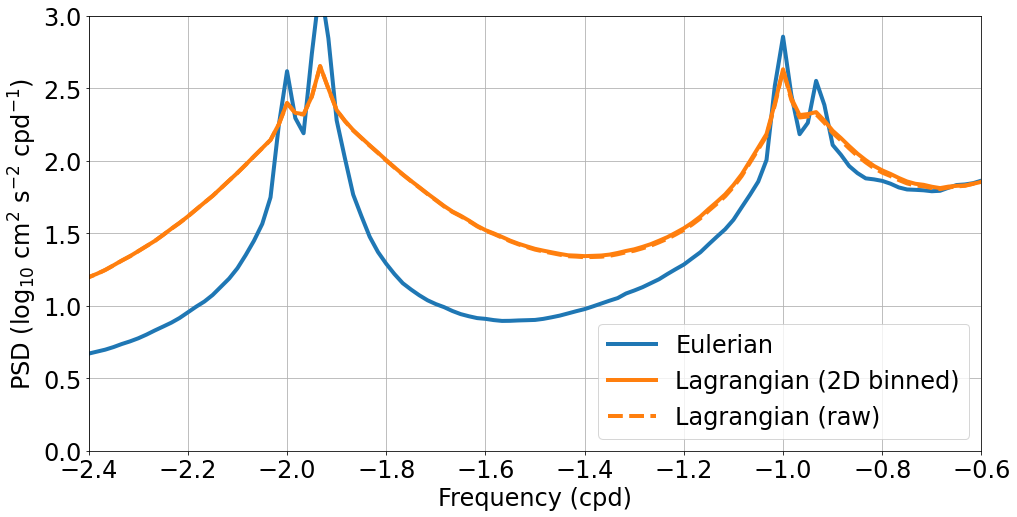

In [35]:
fig, ax = plt.subplots(figsize=(16,8))

labels = ['Eulerian', 'Lagrangian (2D binned)', 'Lagrangian (raw)']
(np.log10((E_E_uv_mean+E_E_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=4)
(np.log10((E_L_bin_uv_mean+E_L_bin_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=4)
(np.log10((E_L_uv_mean+E_L_uv_mean_2)*86400/2/6)).plot(ax=ax,label=labels[2],linewidth=4,color='tab:orange', ls='--')
ax.grid()
ax.legend()
ax.set_xlim([-2.4,-0.6])
#ax.set_xticks([ -4, -3, -2, -1, 0., 1., 2., 3., 4.])
ax.set_ylim([0,3])
#ax.set_yticks([1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)

#plt.savefig('/home1/datahome/xyu/equinox_working/Lagrangian_vs_Eulerian_LLC4320/Figures/Rotary_spectra_LLC_global_mean_EulvsLag_zoomin.png')

# Zonallly averaged spectra

In [51]:
ds_L_bin = (p.load_diagnostic('spectra_uv_T60_mean0_lat_from_2Dbinned_spectra.zarr')
            .rename({'E':'E_Lagrangian', 'lat_bins': 'lat'})
           )
ds_L_bin

<xarray.Dataset>
Dimensions:       (frequency: 1440, lat: 119)
Coordinates:
  * frequency     (frequency) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat           (lat) float64 -59.5 -58.5 -57.5 -56.5 ... 55.5 56.5 57.5 58.5
Data variables:
    E_Lagrangian  (lat, frequency) float64 dask.array<chunksize=(60, 100), meta=np.ndarray>

In [52]:
# load raw spectra
ds_L = (p.load_diagnostic('spectra_uv_T60_mean0_lat.zarr')
        .rename({'E':'E_Lagrangian', 'lat_bins': 'lat'})
       )

ds_E = (xr.open_zarr(os.path.join(ut.root_data_dir,'diags/SSUV_T60_lat.zarr'))
        .rename({'E_SSUV_T60': 'E_Eulerian', 'lat_bin': 'lat'})
       )

ds = xr.merge([ds_L, ds_E])
ds

<xarray.Dataset>
Dimensions:       (frequency: 1440, lat: 119)
Coordinates:
  * frequency     (frequency) float64 -12.0 -11.98 -11.97 ... 11.95 11.97 11.98
  * lat           (lat) float64 -59.5 -58.5 -57.5 -56.5 ... 55.5 56.5 57.5 58.5
Data variables:
    E_Lagrangian  (lat, frequency) float64 dask.array<chunksize=(60, 720), meta=np.ndarray>
    E_Eulerian    (frequency, lat) float64 dask.array<chunksize=(1440, 119), meta=np.ndarray>

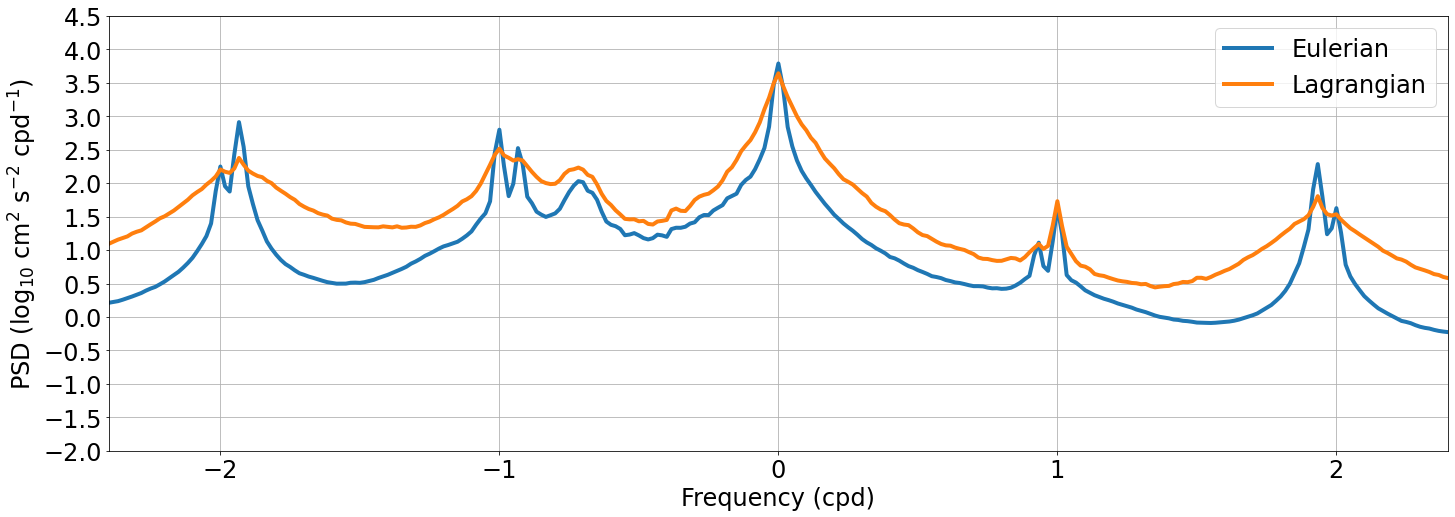

In [54]:
lats = 20.5

fig, ax = plt.subplots(figsize=(24,8))
labels = ['Eulerian', 'Lagrangian']
(np.log10((ds.E_Eulerian.sel(lat=lats))*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=4)
(np.log10((ds.E_Lagrangian.sel(lat=lats))*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=4)
ax.grid()
ax.legend()
ax.set_xlim([-12.,12.])
ax.set_xticks([-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.])
ax.set_xlim([-2.4,2.4])
ax.set_ylim([-2,4.5])
ax.set_yticks([-2,-1.5,-1,-0.5, 0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.set_title('',fontsize=24)
ax.tick_params(labelsize=24)

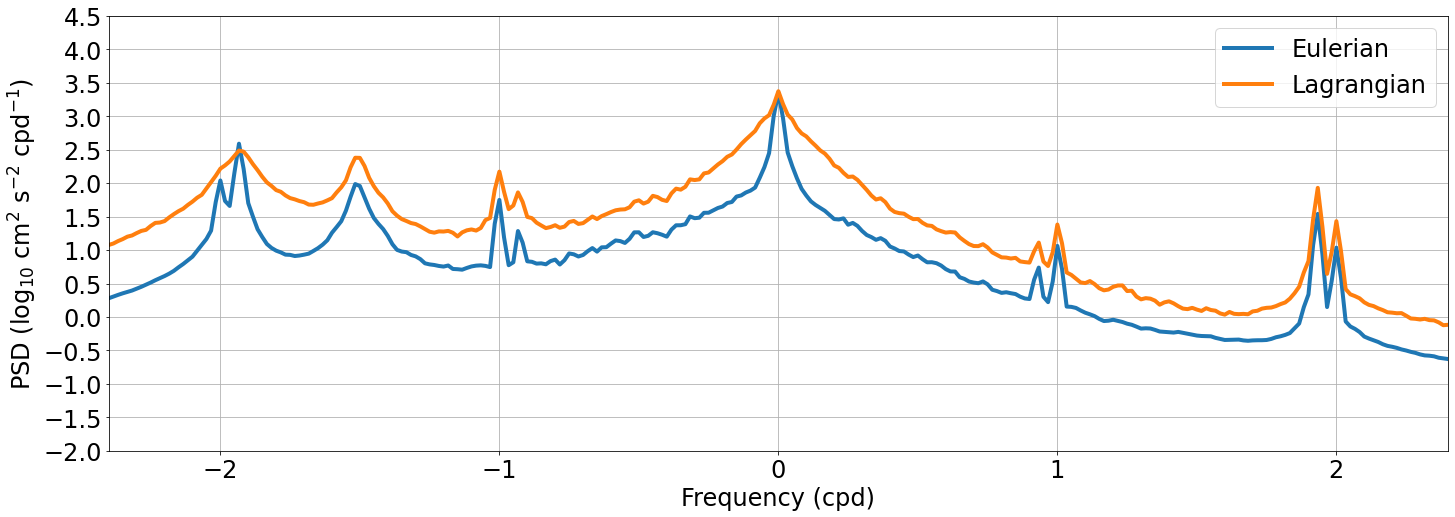

In [56]:
lats = 48.5

fig, ax = plt.subplots(figsize=(24,8))
labels = ['Eulerian', 'Lagrangian']
(np.log10((ds.E_Eulerian.sel(lat=lats))*86400/2/6)).plot(ax=ax,label=labels[0],linewidth=4)
(np.log10((ds.E_Lagrangian.sel(lat=lats))*86400/2/6)).plot(ax=ax,label=labels[1],linewidth=4)
ax.grid()
ax.legend()
ax.set_xlim([-12.,12.])
ax.set_xticks([-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.])
ax.set_xlim([-2.4,2.4])
ax.set_ylim([-2,4.5])
ax.set_yticks([-2,-1.5,-1,-0.5, 0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.,4.5])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD (log$_{10}$ cm$^2$ s$^{-2}$ cpd$^{-1}$)',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.set_title('',fontsize=24)
ax.tick_params(labelsize=24)

# Specific regions

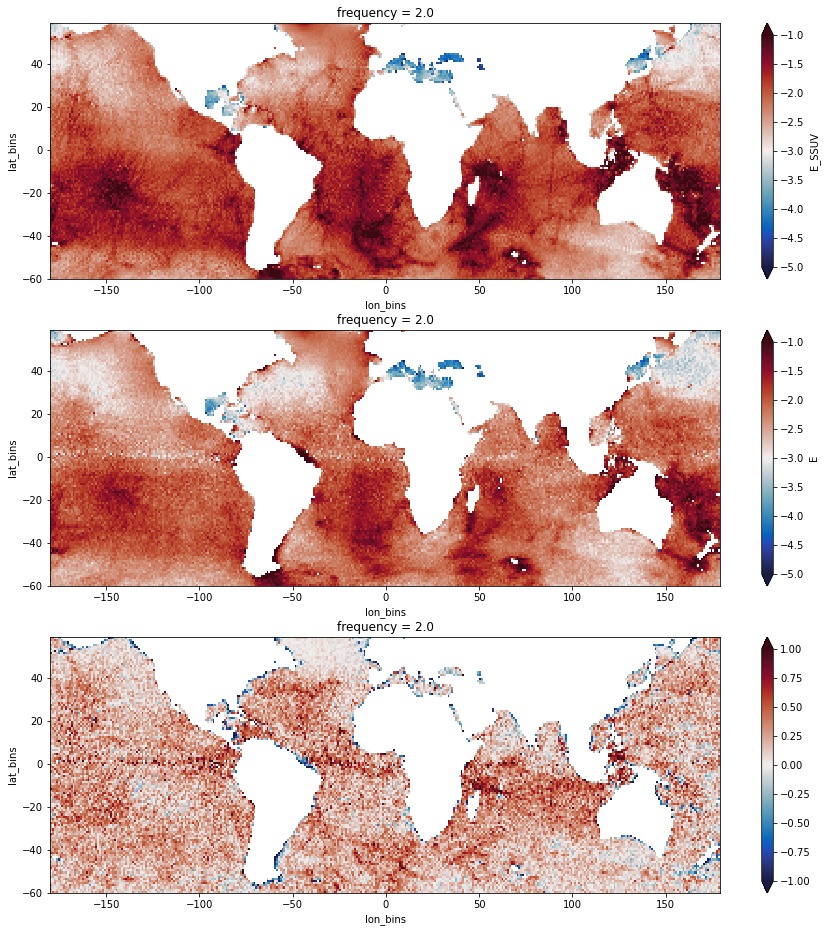

In [9]:
# load spectra
fig, ax = plt.subplots(figsize=(15,16))
ax = plt.subplot(311)
np.log10(E_E.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)

ax = plt.subplot(312)
np.log10(E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)

ax = plt.subplot(313)
np.log10(E_E.sel(frequency=2)/E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-1, vmax=1)

(-10.0, 10.0)

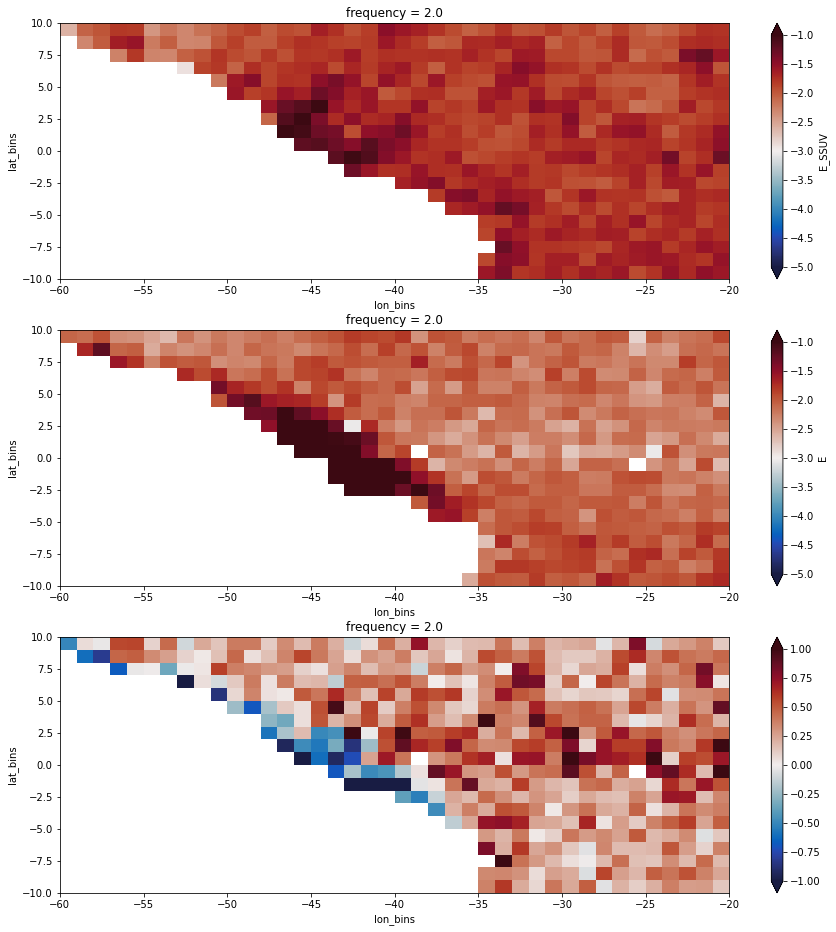

In [35]:
# load spectra
fig, ax = plt.subplots(figsize=(15,16))

ax = plt.subplot(311)
np.log10(E_E.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)
ax.set_xlim(-60., -20.)
ax.set_ylim(-10., 10.)

ax = plt.subplot(312)
np.log10(E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)
ax.set_xlim(-60., -20.)
ax.set_ylim(-10., 10.)

ax = plt.subplot(313)
np.log10(E_E.sel(frequency=2)/E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-1, vmax=1)
ax.set_xlim(-60., -20.)
ax.set_ylim(-10., 10.)

(-12.0, 12.0)

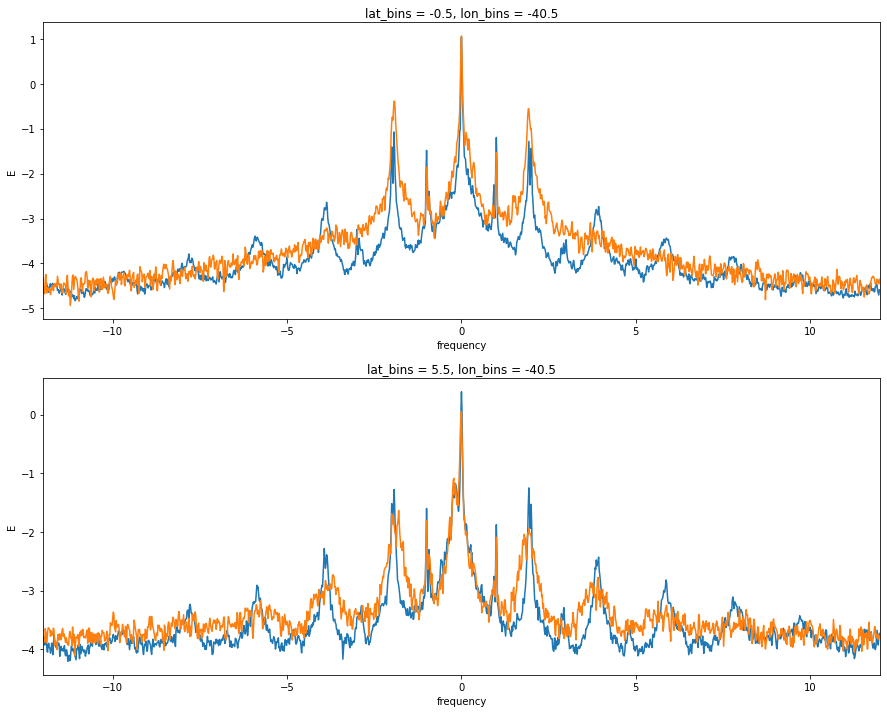

In [12]:
# load spectra
fig, ax = plt.subplots(figsize=(15,12))

ax = plt.subplot(211)
np.log10(E_E.sel(lon_bins=-40.5,lat_bins=-0.5)).plot()
np.log10(E_L.sel(lon_bins=-40.5,lat_bins=-0.5)).plot()
ax.set_xlim(-12., 12.)

ax = plt.subplot(212)
np.log10(E_E.sel(lon_bins=-40.5,lat_bins=5.5)).plot()
np.log10(E_L.sel(lon_bins=-40.5,lat_bins=5.5)).plot()
ax.set_xlim(-12., 12.)

(-60.0, -30.0)

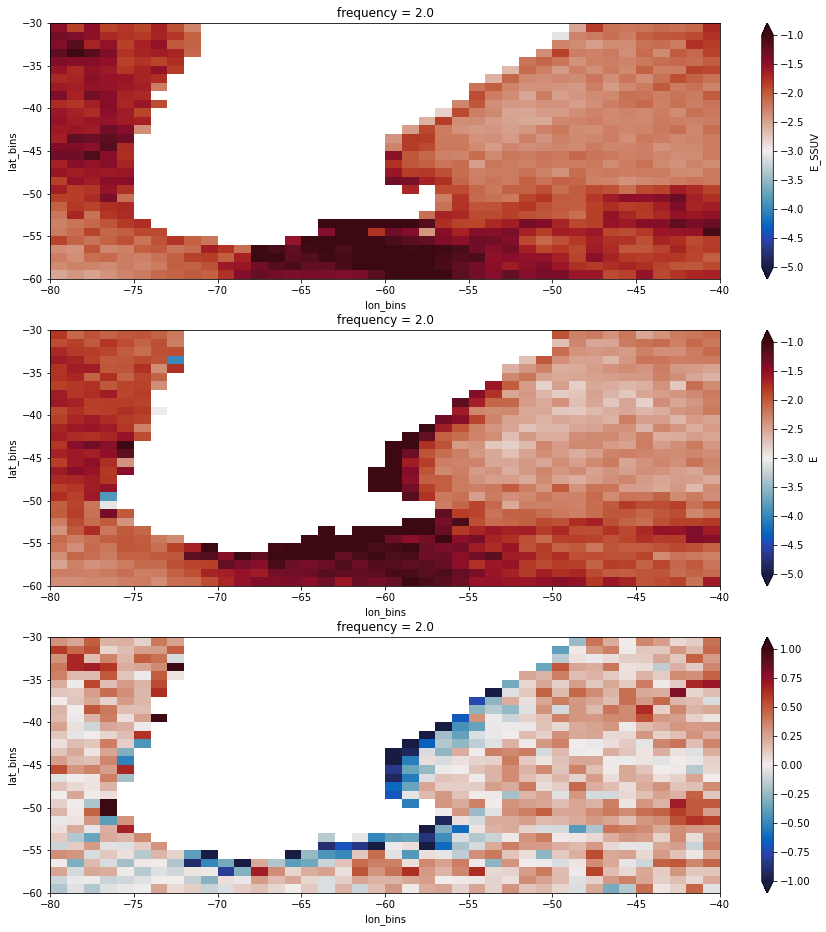

In [54]:
# load spectra
fig, ax = plt.subplots(figsize=(15,16))

ax = plt.subplot(311)
np.log10(E_E.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)
ax.set_xlim(-80., -40.)
ax.set_ylim(-60., -30.)

ax = plt.subplot(312)
np.log10(E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)
ax.set_xlim(-80., -40.)
ax.set_ylim(-60., -30.)

ax = plt.subplot(313)
np.log10(E_E.sel(frequency=2)/E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-1, vmax=1)
ax.set_xlim(-80., -40.)
ax.set_ylim(-60., -30.)


(-4.0, 4.0)

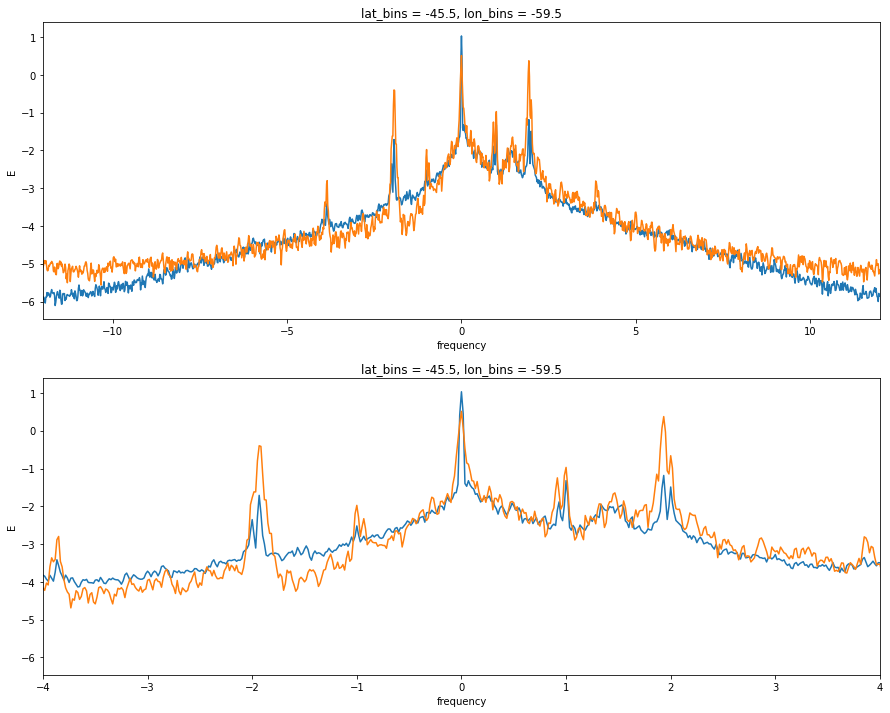

In [17]:
# load spectra
fig, ax = plt.subplots(figsize=(15,12))

ax = plt.subplot(211)
np.log10(E_E.sel(lon_bins=-59.5,lat_bins=-45.5)).plot()
np.log10(E_L.sel(lon_bins=-59.5,lat_bins=-45.5)).plot()
ax.set_xlim([-12.,12.])

ax = plt.subplot(212)
np.log10(E_E.sel(lon_bins=-59.5,lat_bins=-45.5)).plot()
np.log10(E_L.sel(lon_bins=-59.5,lat_bins=-45.5)).plot()
ax.set_xlim(-4., 4.)

(-10.0, 10.0)

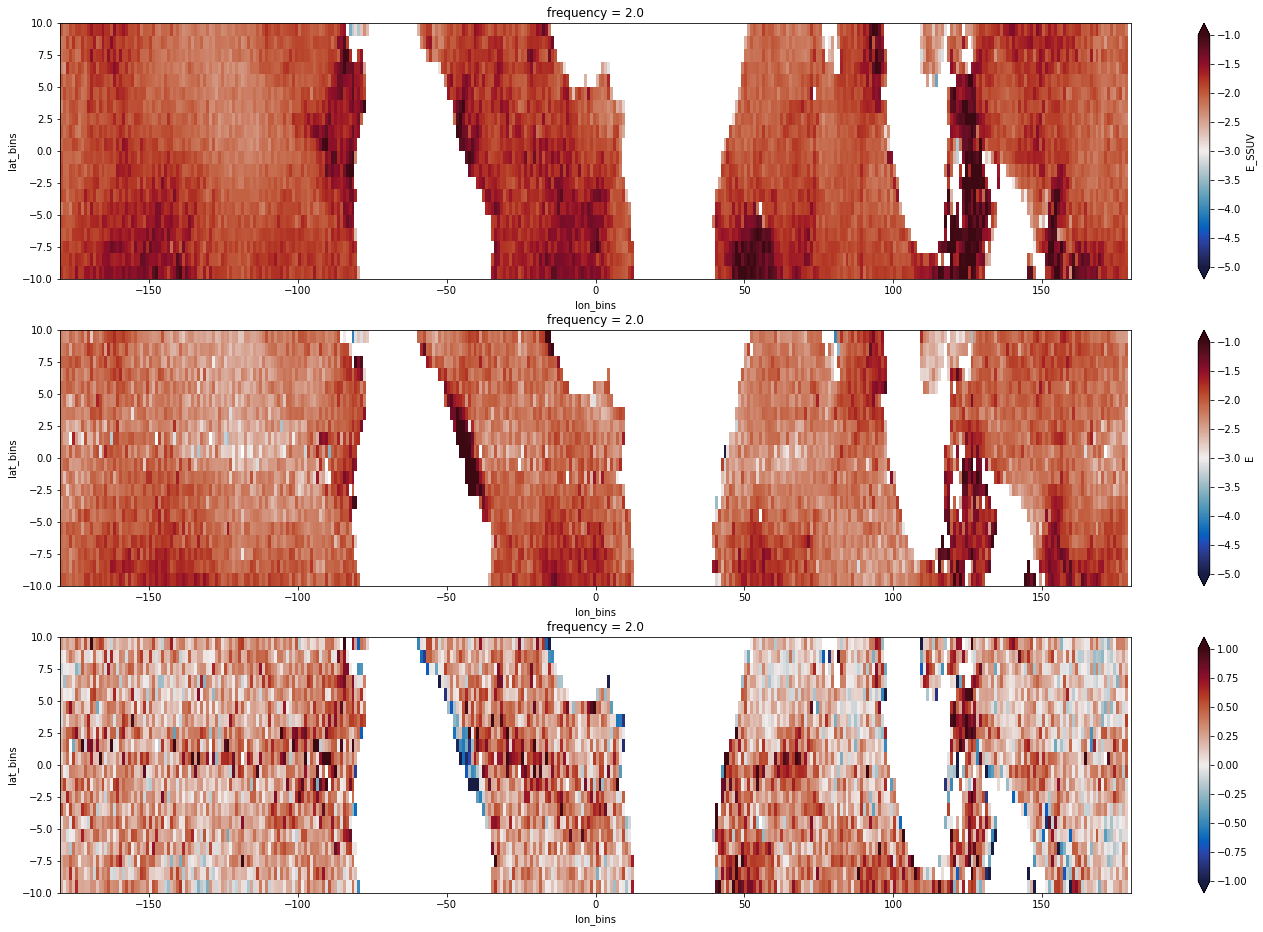

In [10]:
# load spectra
fig, ax = plt.subplots(figsize=(24,16))

ax = plt.subplot(311)
np.log10(E_E.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)
ax.set_xlim(-180., 180.)
ax.set_ylim(-10., 10.)

ax = plt.subplot(312)
np.log10(E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-5, vmax=-1)
ax.set_xlim(-180., 180.)
ax.set_ylim(-10., 10.)

ax = plt.subplot(313)
np.log10(E_E.sel(frequency=2)/E_L.sel(frequency=2)).plot(x='lon_bins', cmap=cm.balance, vmin=-1, vmax=1)
ax.set_xlim(-180., 180.)
ax.set_ylim(-10., 10.)

(-4.0, 4.0)

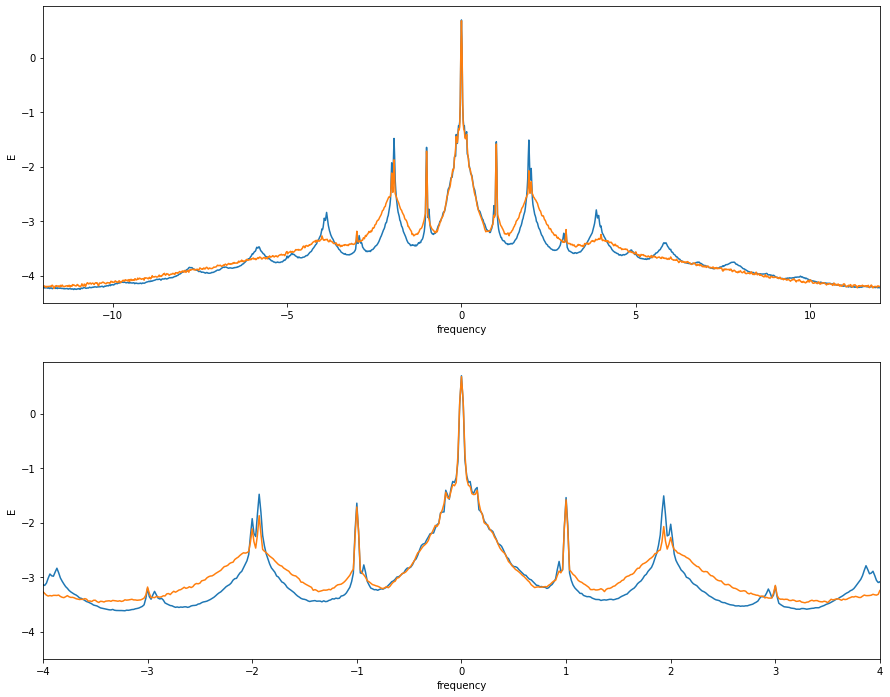

In [13]:
# load spectra
fig, ax = plt.subplots(figsize=(15,12))

ax = plt.subplot(211)
np.log10(E_E.sel(lon_bins=slice(-150.5,-100.5),lat_bins=slice(-2.5,2.5)).mean(['lon_bins','lat_bins'])).plot()
np.log10(E_L.sel(lon_bins=slice(-150.5,-100.5),lat_bins=slice(-2.5,2.5)).mean(['lon_bins','lat_bins'])).plot()
ax.set_xlim([-12.,12.])

ax = plt.subplot(212)
np.log10(E_E.sel(lon_bins=slice(-150.5,-100.5),lat_bins=slice(-2.5,2.5)).mean(['lon_bins','lat_bins'])).plot()
np.log10(E_L.sel(lon_bins=slice(-150.5,-100.5),lat_bins=slice(-2.5,2.5)).mean(['lon_bins','lat_bins'])).plot()
ax.set_xlim(-4., 4.)

## Close cluster

In [17]:
cluster.close()